In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
colors = ['brown', 'red', 'orange', 'green', 'blue', 'purple']
labels = ['Logistic Regression', '1-Layer NN', '2-Layer NN', '3-Layer NN', '4-Layer NN', '10-Layer NN']

colnames = {'auc': 'AUC', 'max_error': 'Maximum\nIndividual Loss', 'avg_error': 'Average\nIndividual Loss', 
           'max_grp_error': 'Maximum\nGroup Loss', 'avg_grp_error': 'Average\nGroup Loss'
           }

dataset_names = {'COMPAS': 'COMPAS', 'BANK': 'Bank Marketing', 'ADULT': 'Adult Income',
                 'DEFAULT': 'Credit Card Default', 'COMMUNITIES': 'Communities & Crime'}

In [3]:
layers = 0

datasets = ['COMPAS', 'BANK', 'ADULT', 'DEFAULT', 'COMMUNITIES']
base_dir = 'Output/'

dfs_all = list()
dfs_best = list()

for dataset in datasets:
    df = pd.read_csv(base_dir+dataset+'-'+str(layers)+'-Layer-NN.csv', index_col = 0)
    best = df.loc[df.groupby('l').obj_val.idxmin()].reset_index(drop = True)
    
    dfs_all.append(df)
    dfs_best.append(best)


In [4]:
cmap = matplotlib.cm.get_cmap('cool')

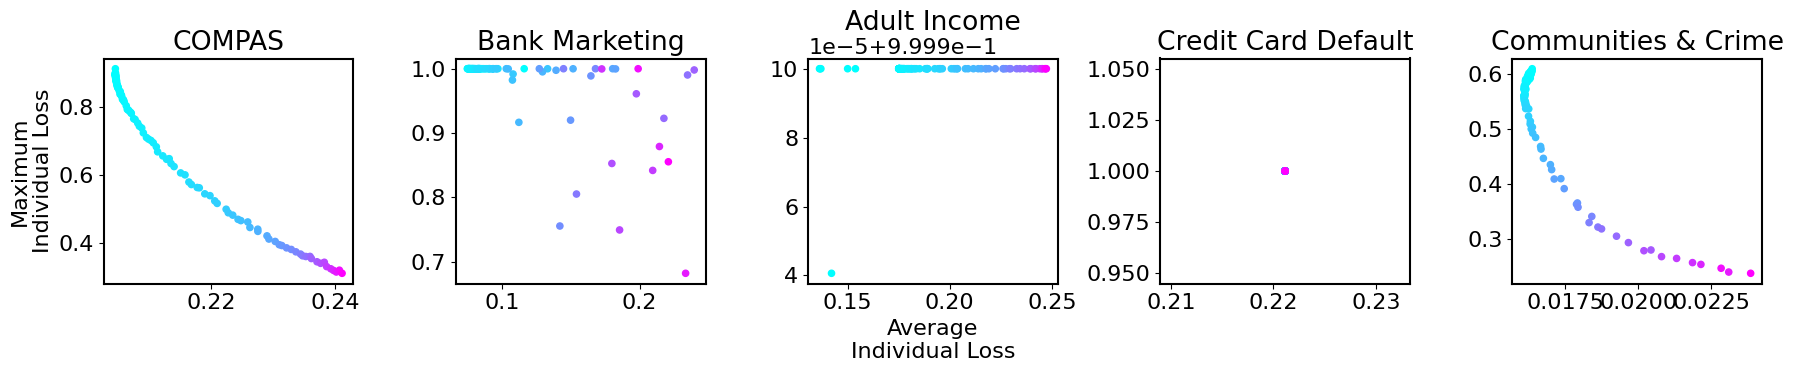

In [5]:
plt.rcParams.update({'font.size': 16, 'axes.linewidth': 1.5 })

window = 1
xcol = 'avg_error'
ycol = 'max_error'
s = 20


f,ax = plt.subplots(1, 5, figsize = (18,4))

for i,df in enumerate(dfs_best):

    ax[i].scatter(df.loc[:,xcol].rolling(window = window, min_periods = 1).mean(), df.loc[:,ycol].rolling(window = window, min_periods = 1).mean(),
                  c = df.l, cmap = cmap, 
                  label = labels[i], s = s)
    
    ax[i].set_title(dataset_names[datasets[i]])
    
    
#plt.legend()
ax[2].set_xlabel(colnames[xcol])
ax[0].set_ylabel(colnames[ycol])

plt.tight_layout()


# Logistic Regression Plots

/var/folders/9w/jq24phgx4wd7d5s6g670b7j00000gn/T/ipykernel_9514/3057707974.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


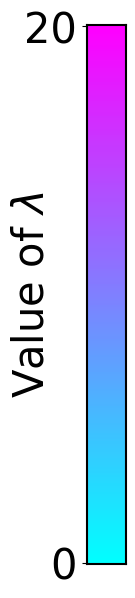

In [3]:
cmap = matplotlib.cm.get_cmap('cool')

plt.rcParams.update({'font.size': 30, 'axes.linewidth': 1.5 })

fig,ax = plt.subplots(figsize = (0.5,7))

gradient = np.flip(np.linspace(0, 1, 256))
gradient = np.vstack((gradient, gradient))

plt.imshow(np.transpose(gradient), aspect='auto', cmap=cmap)

plt.gca().axes.get_xaxis().set_visible(False)
plt.yticks([0,255], [20,0], fontsize = 30)
plt.ylabel('Value of $\lambda$', labelpad = -20)

plt.tight_layout()

plt.savefig('Figures/colormap.pdf', bbox_inches='tight', pad_inches=0.1)

/opt/miniconda3/envs/fair_ml/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


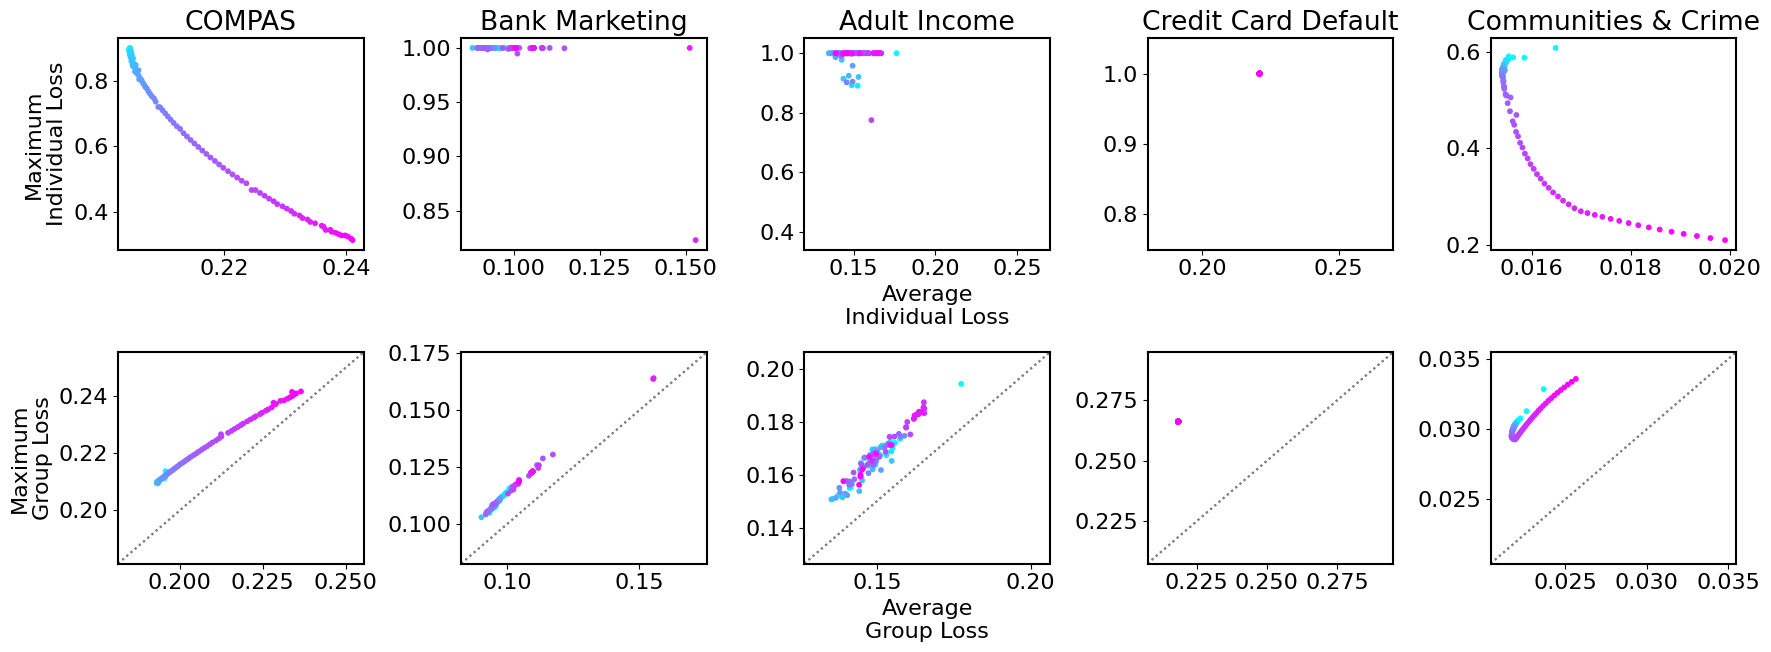

In [19]:
layers = 0

datasets = ['COMPAS', 'BANK', 'ADULT', 'DEFAULT', 'COMMUNITIES']
base_dir = 'Output/'

dfs_all = list()
dfs_best = list()

for dataset in datasets:
    df = pd.read_csv(base_dir+dataset+'-'+str(layers)+'-Layer-NN.csv', index_col = 0)
    best = df.loc[df.groupby('l').obj_val.idxmin()].reset_index(drop = True)
    
    dfs_all.append(df)
    dfs_best.append(best)

    
    
plt.rcParams.update({'font.size': 16, 'axes.linewidth': 1.5 })

figsize = (18,6.8)

window = 1
xcols = ['avg_error', 'avg_grp_error']
ycols = ['max_error', 'max_grp_error']
s = 10


f,ax = plt.subplots(2, 5, figsize = figsize)

for j in [0,1]:
    for i,df in enumerate(dfs_best):

        ax[j,i].scatter(df.loc[:,xcols[j]].rolling(window = window, min_periods = 1).mean(), df.loc[:,ycols[j]].rolling(window = window, min_periods = 1).mean(),
                      c = np.log(df.l), vmax = np.log(20), vmin = np.log(0.1), cmap = cmap, 
                      label = labels[i], s = s)
        
        if i == 0:
            ax[j,i].set_ylabel(colnames[ycols[j]])

        if i == 2:
            ax[j,i].set_xlabel(colnames[xcols[j]])
                
                
                
        if j == 0:
            ax[j,i].set_title(dataset_names[datasets[i]])
            
            if i == 2:
                ax[j,i].set_xlim(0.12, 0.27)
                ax[j,i].set_ylim(0.34, 1.05)
            
            if i == 3:
                ax[j,i].set_xlim(0.18, 0.27)
                ax[j,i].set_ylim(0.75, 1.05)
        
        else:
            xmin,xmax = ax[j,i].get_xlim()
            ymin,ymax = ax[j,i].get_ylim()

            ax[j,i].axline([0, 0], [1, 1], linestyle = ':', color = 'gray')


            ax[j,i].set_xlim(min(xmin, ymin)*0.95, max(xmax, ymax)*1.05)
            ax[j,i].set_ylim(min(xmin, ymin)*0.95, max(xmax, ymax)*1.05)
            ax[j,i].axline([0, 0], [1, 1], linestyle = ':', color = 'gray')
            

plt.tight_layout()

# plt.subplots_adjust(
#                     #left=0.1,
#                     #bottom=0.1,
#                     #right=0.9,
#                     #top=0.9,
#                     wspace=0.4,
#                     hspace=0.4,
#                     )

plt.savefig('Figures/Logistic-Frontier.pdf',bbox_inches='tight')


# Increasing Model Complexity

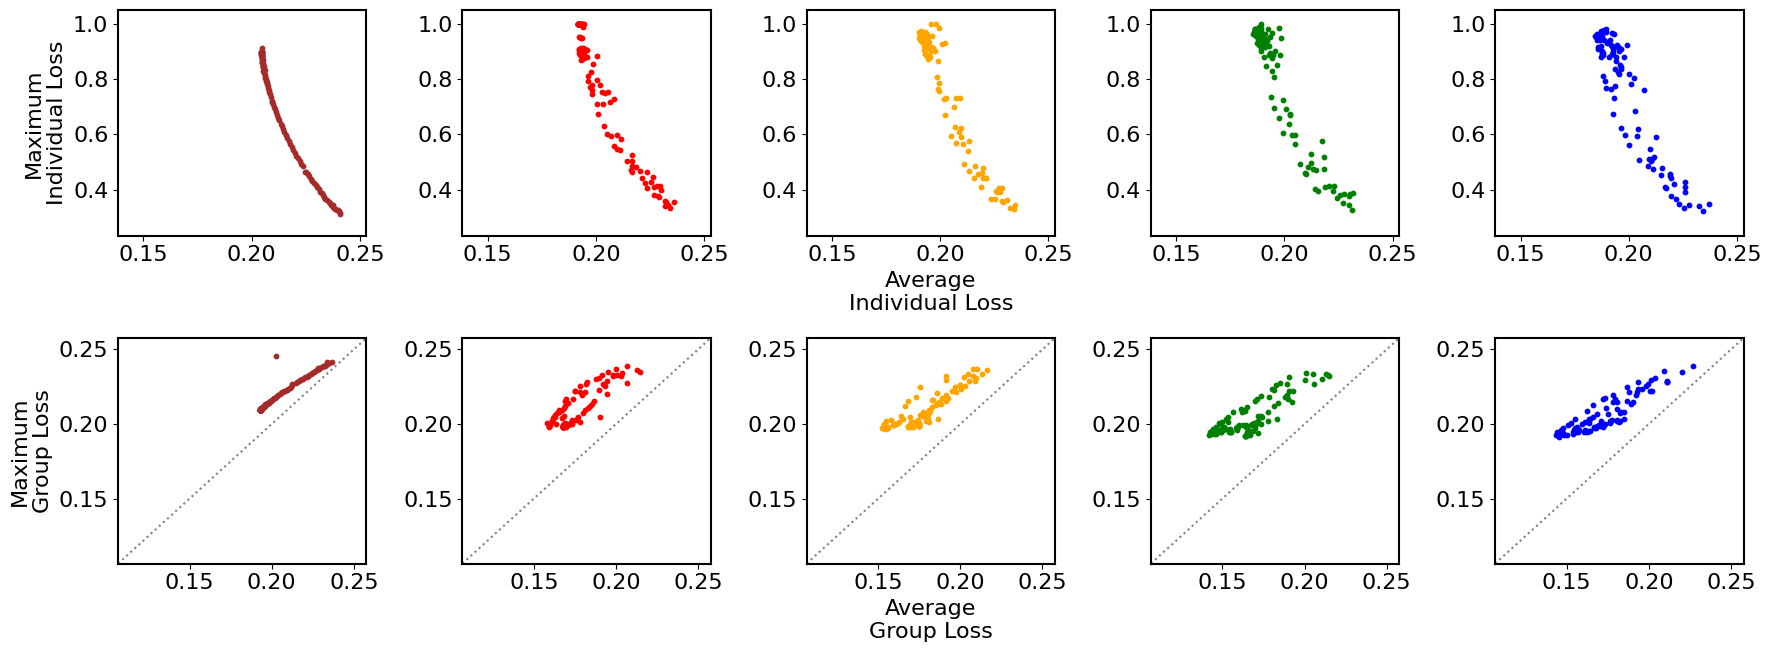

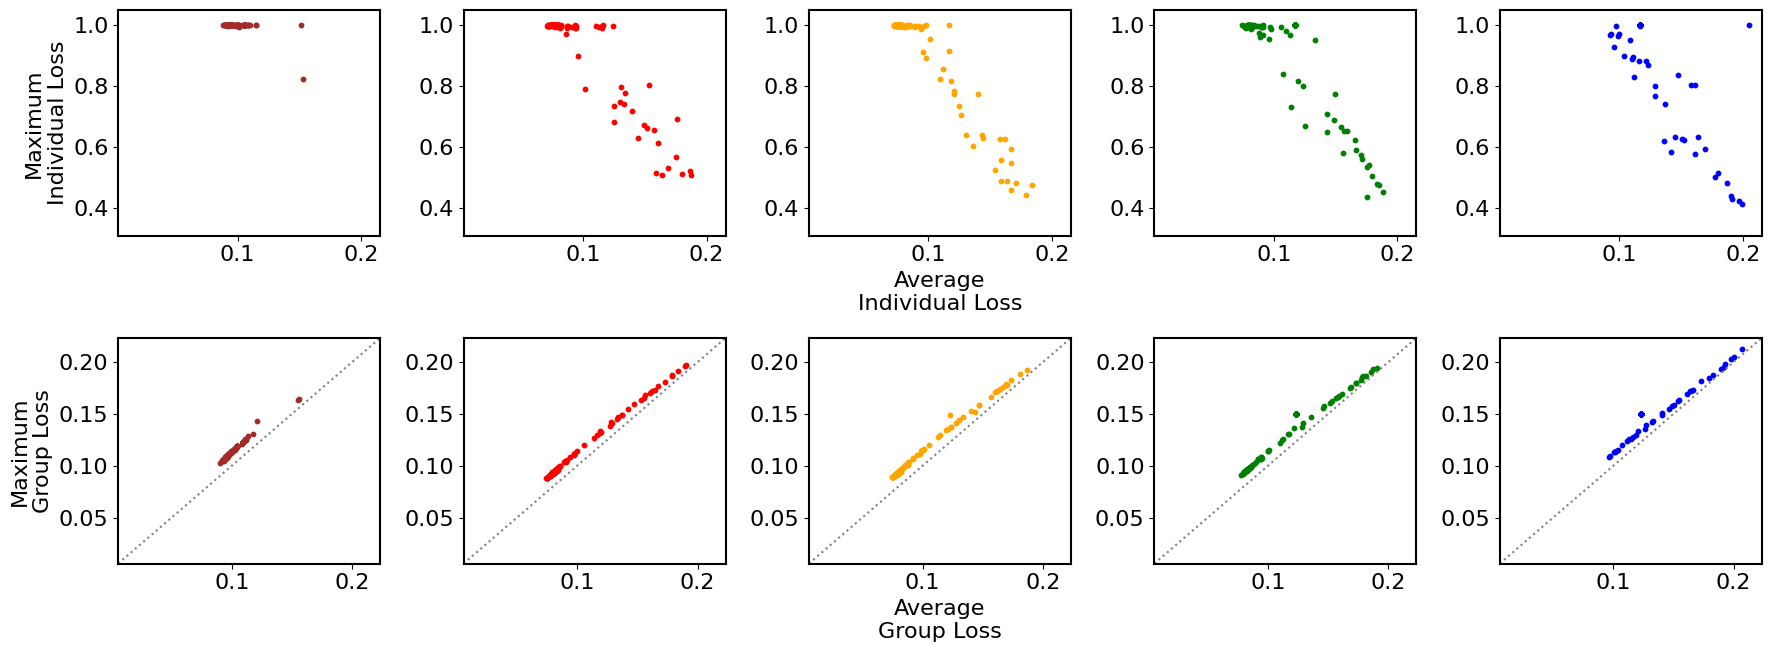

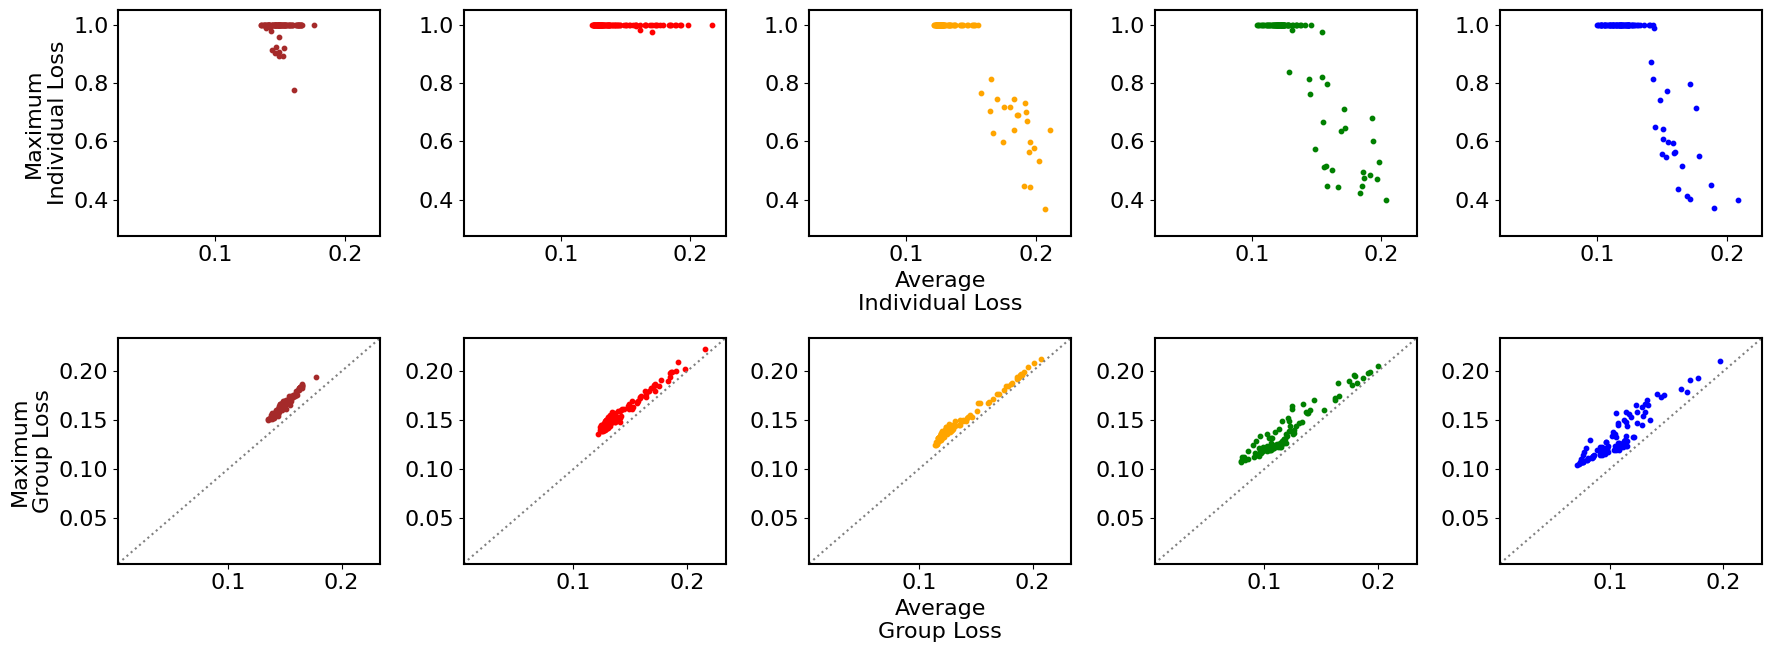

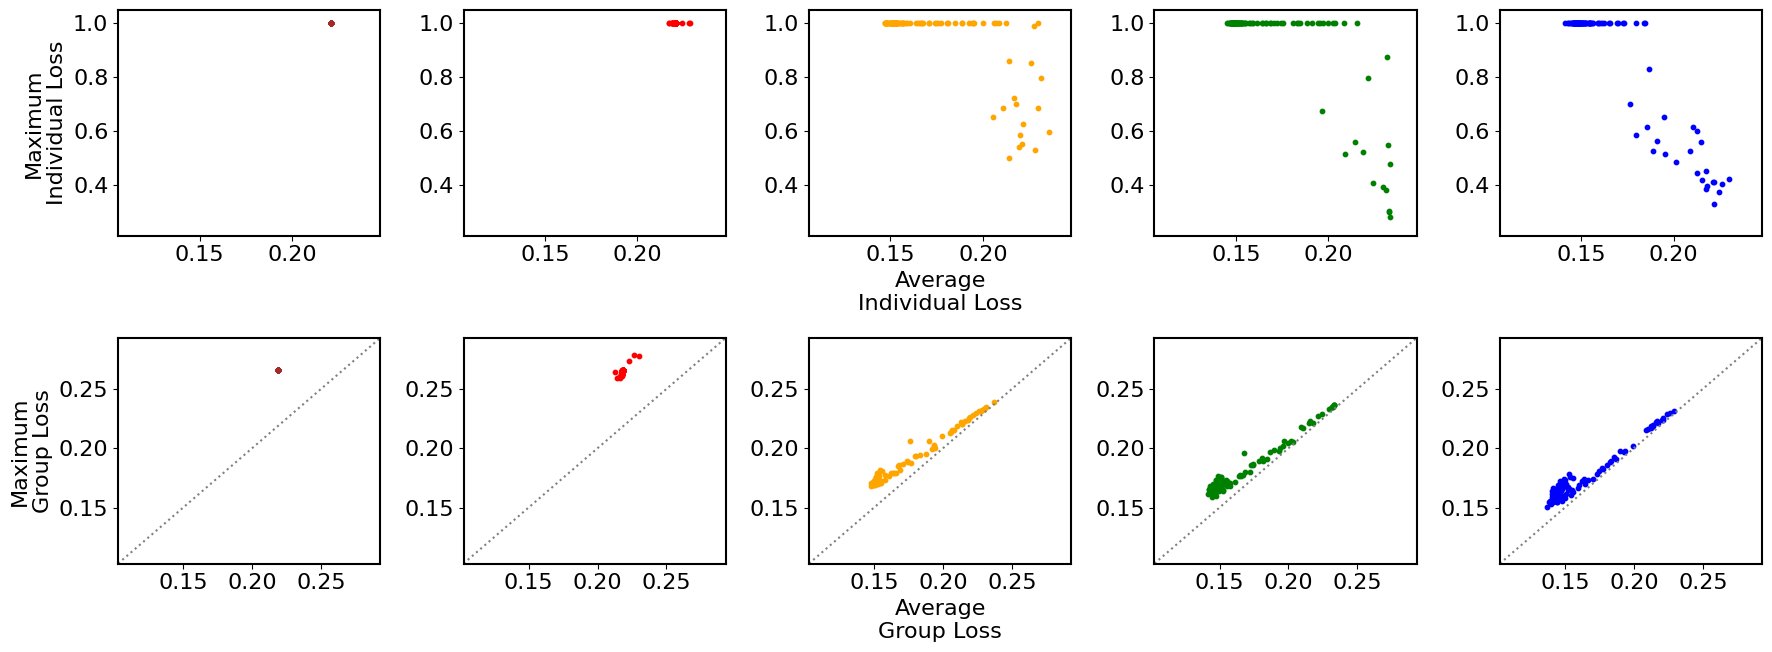

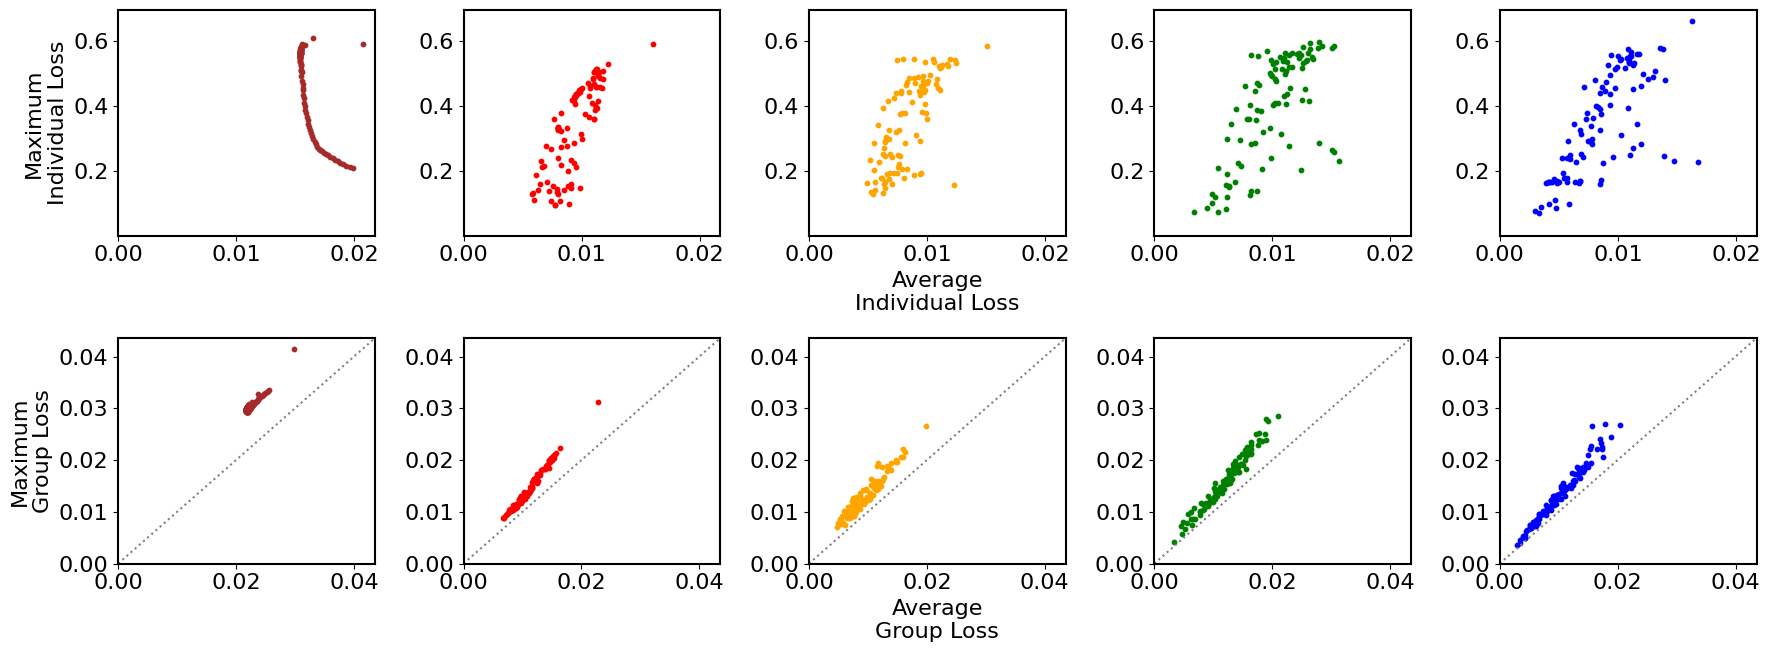

In [23]:
figsize = (18,6.8)
fontsize = 16

datasets = ['COMPAS', 'BANK', 'ADULT', 'DEFAULT', 'COMMUNITIES']


window = 1
xcols = ['avg_error', 'avg_grp_error']
ycols = ['max_error', 'max_grp_error']
s = 10


base_dir = 'Output/'

for dataset in datasets:

    df_out_0layer = pd.read_csv(base_dir+dataset+'-0-Layer-NN.csv', index_col = 0)
    best_0l = df_out_0layer.loc[df_out_0layer.groupby('l').obj_val.idxmin()].reset_index(drop = True)

    df_out_1layer = pd.read_csv(base_dir+dataset+'-1-Layer-NN.csv', index_col = 0)
    best_1l = df_out_1layer.loc[df_out_1layer.groupby('l').obj_val.idxmin()].reset_index(drop = True)

    df_out_2layer = pd.read_csv(base_dir+dataset+'-2-Layer-NN.csv', index_col = 0)
    best_2l = df_out_2layer.loc[df_out_2layer.groupby('l').obj_val.idxmin()].reset_index(drop = True)

    df_out_3layer = pd.read_csv(base_dir+dataset+'-3-Layer-NN.csv', index_col = 0)
    best_3l = df_out_3layer.loc[df_out_3layer.groupby('l').obj_val.idxmin()].reset_index(drop = True)

    df_out_4layer = pd.read_csv(base_dir+dataset+'-4-Layer-NN.csv', index_col = 0)
    best_4l = df_out_4layer.loc[df_out_4layer.groupby('l').obj_val.idxmin()].reset_index(drop = True)

    #df_out_10layer = pd.read_csv(base_dir+dataset+'-10-Layer-NN.csv', index_col = 0)
    #best_10l = df_out_10layer.loc[df_out_10layer.groupby('l').obj_val.idxmin()].reset_index(drop = True)


    dfs_all = [df_out_0layer, df_out_1layer, df_out_2layer, df_out_3layer, df_out_4layer,
               #df_out_10layer
              ]
    dfs_best = [best_0l, best_1l, best_2l, best_3l, best_4l,
               #best_10l
               ]
    
    
    
    plt.rcParams.update({'font.size': 16, 'axes.linewidth': 1.5 })


    f,ax = plt.subplots(2, len(dfs_all), figsize = figsize)

    
    for j in [0,1]:
      
        # Defining custom 'xlim' and 'ylim' values.

        ymax = max([df.loc[:,ycols[j]].max() for df in dfs_best])*1.05
        ymin = min([df.loc[:,ycols[j]].min() for df in dfs_best])*0.75

        xmax = max([df.loc[:,xcols[j]].max() for df in dfs_best])*1.05
        xmin = min([df.loc[:,xcols[j]].min() for df in dfs_best])*.75

        
        if xmin < 0.1:
            xmin = max(xmin - 0.05, 0)
        if ymin < 0.1:
            ymin = max(ymin - 0.05, 0)
        
        xymin = min(xmin,ymin)
        xymax = max(xmax,ymax)
        
        
        #print(xmin, xmax)
        #print(ymin, ymax)
        #print(xymin, xymax)
        
        
        
        for i,df in enumerate(dfs_best):
            
            ax[j,i].scatter(df.loc[:,xcols[j]].rolling(window = window, min_periods = 1).mean(), df.loc[:,ycols[j]].rolling(window = window, min_periods = 1).mean(),
                          color = colors[i],
                          label = labels[i], s = s)

            if i == 0:
                ax[j,i].set_ylabel(colnames[ycols[j]])

            if i == 2:
                ax[j,i].set_xlabel(colnames[xcols[j]])


            # Setting the values for all axes.
            
            if j == 0:
                ax[j,i].set_xlim(xmin, xmax)
                ax[j,i].set_ylim(ymin, ymax)
            
            
            if j == 1:
                ax[j,i].axline([0, 0], [1, 1], linestyle = ':', color = 'gray')
                
                ax[j,i].set_xlim(xymin, xymax)
                ax[j,i].set_ylim(xymin, xymax)
            
            
                


    plt.tight_layout()


    #plt.savefig('Figures/'+dataset+'-Frontier.pdf',bbox_inches='tight')
    
    